# Exploratory data analysis (EDA)

## Dataset

**Hand Gesture of the Colombian sign language** dataset is taken from [kaggle](https://www.kaggle.com/evernext10/hand-gesture-of-the-colombian-sign-language). <br>
Images represent hand gestures for numbers (0-5) and vowels (A, E, I, O, U). <br>

In [1]:
signs = ['0', '1', '2', '3', '4', '5', 'A', 'E', 'I', 'O', 'U']

### Corrupted files

Dataset contains corrupted files: 
- 2_men (107).JPG
- 2_men (108).JPG	
- 3_men (140).JPG	
- 3_men (141).JPG	
- 4_men (5).JPG
- 4_men (6).JPG

I removed all of them.

## Files

### Filenames

Let's see how many images are for each sign.

In [2]:
from os import listdir
from os.path import isfile, join
import platform


def get_filenames(path):
    filenames = [file for file in listdir(path) if isfile(join(path, file))]
    if platform.system() == 'Darwin':
        filenames.remove('.DS_Store')
    return filenames

In [3]:
def get_path_based_on_sex(sign, men=True):
    return '../data/men/' + sign + '/' if men else '../data/Woman/' + sign + '/'

In [4]:
def get_gestures_count(men=True, signs=signs):
    gestures = {}
    for sign in signs:
        path = get_path_based_on_sex(sign, men)
        files = get_filenames(path)
        gestures[sign] = len(files)
    return gestures


men_gestures = get_gestures_count()
women_gestures = get_gestures_count(False)

- Men <br>
Below we can observe number of images for each gesture.

In [5]:
import pandas as pd

men_gestures_df = pd.DataFrame.from_dict([men_gestures])
display(men_gestures_df)

,0,1,2,3,4,5,A,E,I,O,U
0,172,175,175,180,168,177,175,173,173,175,177


and the same data plotted as bar plot

In [6]:
import matplotlib.pyplot as plt

def plot_data(dictionary: dict, offset=5):
    plt.ylim(
    min(dictionary.values()) - offset,
    max(dictionary.values()) + offset)
    plt.bar(dictionary.keys(), dictionary.values())

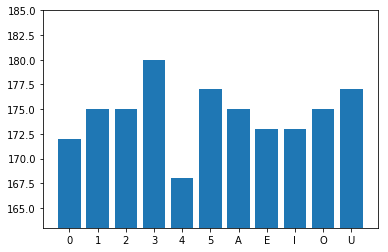

In [7]:
plot_data(men_gestures)

In [8]:
count_gestures_men = sum(men_gestures.values())
print(f'I have {count_gestures_men} gestures shown by men.')

I have 1920 gestures shown by men.


`Observation: ` <br>
Number of images for each gestures shown by men is around 175. <br>
I have the largest number of images for <b>3</b> sign - 180. <br>
<b>0</b> sign has the lowest number of images - 172, which is not very far from others and mean.

- Women <br>
Below we can observe number of images for each gesture.

In [9]:
women_gestures_df = pd.DataFrame.from_dict([women_gestures])
display(women_gestures_df)

,0,1,2,3,4,5,A,E,I,O,U
0,115,125,133,136,133,132,127,127,126,125,120


and the same data plotted as bar plot

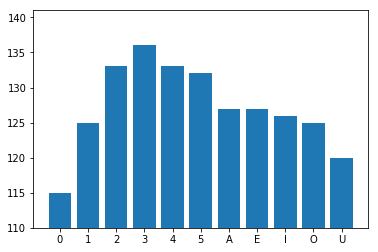

In [10]:
plot_data(women_gestures)

In [11]:
count_gestures_women = sum(women_gestures.values())
print(f'I have {count_gestures_women} gestures shown by women.')
print(f'It is {count_gestures_women/ (count_gestures_men + count_gestures_women)}% of all images.')

I have 1399 gestures shown by women.
It is 0.42151250376619465% of all images.


`Observation: ` <br>
Number of images for each gestures shown by women is around 127. <br>
I have the largest number of images for <b>3</b> sign - 136. <br>
<b>0</b> sign has the lowest number of images - 115.

- Overall sum of images for each gesture

In [12]:
gestures_df = men_gestures_df.add(women_gestures_df, fill_value=0)
display(gestures_df)

,0,1,2,3,4,5,A,E,I,O,U
0,287,300,308,316,301,309,302,300,299,300,297


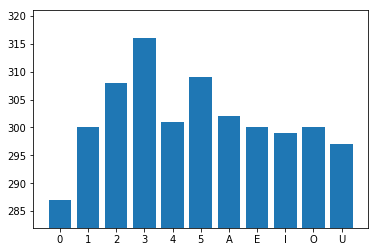

In [13]:
plot_data(gestures_df.to_dict('records')[0])

`Observation: ` <br>
Each of the signs: 3, 5 and 2 has more occurrences than the rest. <br>
0 has the lowest number of images. <br>
The rest of signs has similar count of images.

Then I check if all files in each sign's directory has **prefix** with sign name e.g. all images representing A has 'A' letter at the beggining of filename. <br>
If it's true, it will be easier to create image dataset.

In [14]:
def check_if_filename_starts_with_gesture_name(men=True, signs=signs):
    filenames_start_with_gesture_name = {}
    for sign in signs:
        path = get_path_based_on_sex(sign, men)
        files = get_filenames(path)
        filenames_start_with_gesture_name[sign] = all(
            file.startswith(sign) or file.startswith(sign.lower())
            for file in files)
    return filenames_start_with_gesture_name


men_filenames_start_with_gesture_name = check_if_filename_starts_with_gesture_name(
)
women_filenames_start_with_gesture_name = check_if_filename_starts_with_gesture_name(
    False)

- Men <br>
Below we can observe if all files under given gesture directory have filename that has gesture name at the beginning.

In [15]:
men_filenames_start_with_gesture_name_df = pd.DataFrame.from_dict(
    [men_filenames_start_with_gesture_name])
display(men_filenames_start_with_gesture_name_df)

,0,1,2,3,4,5,A,E,I,O,U
0,True,True,True,True,True,True,True,True,True,True,True


`Observation: ` <br>
All filenames starts with gesture name.

- Women <br>
Below we can observe if all files under given gesture directory have filename that has gesture name at the beginning.

In [16]:
women_filenames_start_with_gesture_name_df = pd.DataFrame.from_dict(
    [women_filenames_start_with_gesture_name])
display(women_filenames_start_with_gesture_name_df)

,0,1,2,3,4,5,A,E,I,O,U
0,True,True,True,True,True,True,True,True,True,True,True


`Observation: ` <br>
All filenames starts with gesture name.

### Data format
Do images have same extension?

In [17]:
def check_filenames_extensions(men=True, signs=signs):
    extensions = {}
    for sign in signs:
        path = get_path_based_on_sex(sign, men)
        files = get_filenames(path)
        extensions[sign] = set([file.split('.')[-1] for file in files])
    return extensions


men_files_extensions = check_filenames_extensions()
women_files_extensions = check_filenames_extensions(False)

- men <br>
In below dataframe we can see unique extensions for images representing gestures.

In [18]:
men_files_extensions_df = pd.DataFrame.from_dict(men_files_extensions)
display(men_files_extensions_df)

,0,1,2,3,4,5,A,E,I,O,U
0,{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG}


`Observation: ` <br>
All files have same extension (JPG).

- women <br>
In below dataframe we can see unique extensions for images representing gestures.

In [19]:
women_files_extensions_df = pd.DataFrame.from_dict(women_files_extensions)
display(women_files_extensions_df)

,0,1,2,3,4,5,A,E,I,O,U
0,{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG},{JPG}


`Observation: ` <br>
All files have same extension (JPG).

### Dimensions

In [20]:
from PIL import Image


def get_dimension_statistics(men=True, signs=signs):
    widths = {}
    heights = {}
    for sign in signs:
        path = get_path_based_on_sex(sign, men)
        files = get_filenames(path)
        widths_and_heights = [Image.open(path + f).size for f in files]
        widths[sign] = [width for (width, height) in widths_and_heights]
        heights[sign] = [height for (width, height) in widths_and_heights]
    return widths, heights


widths_men, heights_men = get_dimension_statistics()
widths_women, heights_women = get_dimension_statistics(False)

- men <br>
Below are statistics for images' dimensions in *men* directory for each gesture.

In [21]:
widths_men_df = pd.DataFrame.from_dict(widths_men, orient='index').T
print('WIDTH:')
display(widths_men_df.describe())

heights_men_df = pd.DataFrame.from_dict(heights_men, orient='index').T
print('HEIGHT:')
display(heights_men_df.describe())

WIDTH:


,0,1,2,3,4,5,A,E,I,O,U
count,172.0,175.0,175.0,180.0,168.0,177.0,175.0,173.0,173.0,175.0,177.0
mean,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
25%,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
50%,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
75%,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
max,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0


HEIGHT:


,0,1,2,3,4,5,A,E,I,O,U
count,172.0,175.0,175.0,180.0,168.0,177.0,175.0,173.0,173.0,175.0,177.0
mean,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
25%,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
50%,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
75%,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
max,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0


In [22]:
def same_min_and_max(df):
    same = all(df.describe().loc[['min', 'max']].T['min'] == df.describe().loc[
        ['min', 'max']].T['max'])
    print(f'Has same min and max? {same}')
    if same:
        print(f"Value is equal to {df.describe().loc[['min', 'max']].T['min'][0]}.")

In [23]:
print('WIDTH:')
same_min_and_max(widths_men_df)

WIDTH:
Has same min and max? True
Value is equal to 4608.0.


In [24]:
print('HEIGHT:')
same_min_and_max(heights_men_df)

HEIGHT:
Has same min and max? True
Value is equal to 2592.0.


`Observation: ` <br>
All images have same dimensions:
- width: 4608
- height: 2592

- women <br>
Below are statistics for images' dimensions in *women* directory for each gesture.

In [25]:
widths_women_df = pd.DataFrame.from_dict(widths_women, orient='index').T
display(widths_women_df.describe())

heights_women_df = pd.DataFrame.from_dict(heights_women, orient='index').T
display(heights_women_df.describe())

,0,1,2,3,4,5,A,E,I,O,U
count,115.0,125.0,133.0,136.0,133.0,132.0,127.0,127.0,126.0,125.0,120.0
mean,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
25%,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
50%,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
75%,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0
max,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0,4608.0


,0,1,2,3,4,5,A,E,I,O,U
count,115.0,125.0,133.0,136.0,133.0,132.0,127.0,127.0,126.0,125.0,120.0
mean,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
25%,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
50%,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
75%,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0
max,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0,2592.0


In [26]:
print('WIDTH:')
same_min_and_max(widths_women_df)

WIDTH:
Has same min and max? True
Value is equal to 4608.0.


In [27]:
print('HEIGHT:')
same_min_and_max(heights_women_df)

HEIGHT:
Has same min and max? True
Value is equal to 2592.0.


`Observation: ` <br>
All images have same dimensions:
- width: 4608
- height: 2592

`Observation 2: ` <br>
Images of gestures shown by man and woman have same dimensions.

### Data mode
What are images' data modes?

In [28]:
def get_unique_img_modes(men=True, signs=signs):
    unique_modes = {}
    for sign in signs:
        path = get_path_based_on_sex(sign, men)
        files = get_filenames(path)
        modes = [Image.open(path + f).mode for f in files]
        unique_modes[sign] = set(modes)
    return unique_modes


men_unique_img_modes = get_unique_img_modes()
women_unique_img_modes = get_unique_img_modes(False)

- men <br>
Below data frame shows unique images' modes for each gesture.

In [29]:
men_unique_img_modes_df = pd.DataFrame.from_dict(men_unique_img_modes)
display(men_unique_img_modes_df)

,0,1,2,3,4,5,A,E,I,O,U
0,{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB}


`Observation: ` <br>
All images have same mode (RGB).

- women <br>
Below data frame shows unique images' modes for each gesture.

In [30]:
women_unique_img_modes_df = pd.DataFrame.from_dict(women_unique_img_modes)
display(women_unique_img_modes_df)

,0,1,2,3,4,5,A,E,I,O,U
0,{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB},{RGB}


`Observation: ` <br>
All images have same mode (RGB).

`Observation 2: ` <br>
Images of gestures shown by man and woman have same mode.

In [31]:
import random


def show_gestures(men=True, signs=signs):
    label = 'Showing gestures for '
    label += 'men:' if men else 'women:'
    print(label)
    for sign in signs:
        path = get_path_based_on_sex(sign, men)
        files = get_filenames(path)
        print(sign)
        display(Image.open(path + random.choice(files)).resize((256, 128)))

Showing gestures for men:
0


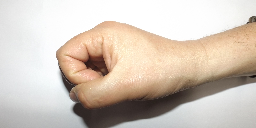

1


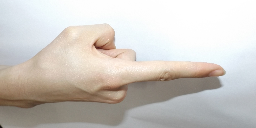

2


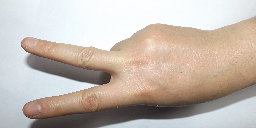

3


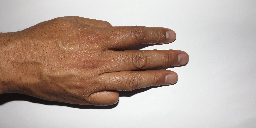

4


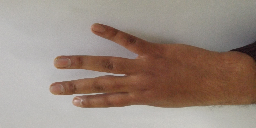

5


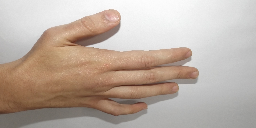

A


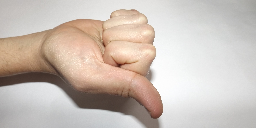

E


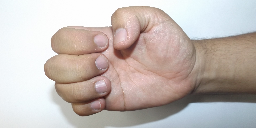

I


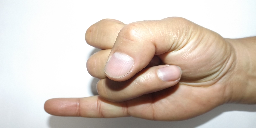

O


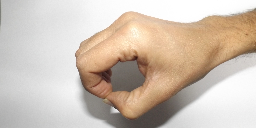

U


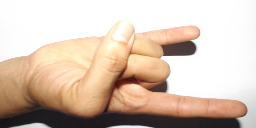

In [32]:
show_gestures()

Showing gestures for women:
0


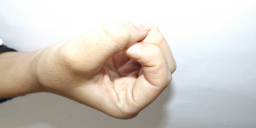

1


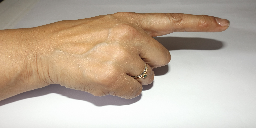

2


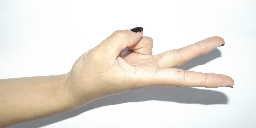

3


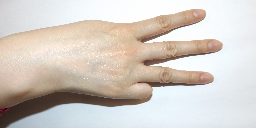

4


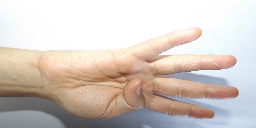

5


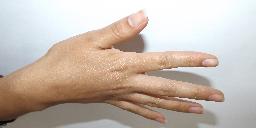

A


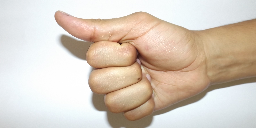

E


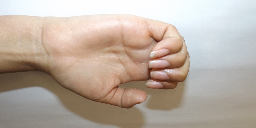

I


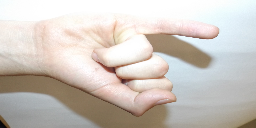

O


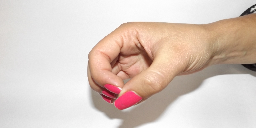

U


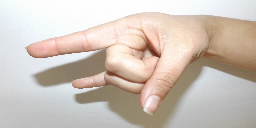

In [33]:
show_gestures(False)

## Train and validation data

Data is not splitted into train and validation so I will do it on my own in *data_preparation/data_loading.py*.

Pictures are divided into shown by men and women. I would like to have a classifier which recognizes gesture no matter who shows it so I have decided to join corresponding signs.

## Gestures to recognize
As some gestures are really simillar I have decided to recognize subset of them.